GETTING DATA THROUGH TIINGO API

In [30]:
import pandas_datareader as data
key= "9af49d881e9a1f20e06526d7ea21ce2cb045846a"

In [31]:
df = data.get_data_tiingo('TSLA', api_key=key) #TSLA - TESLA 

SAVING DATA IN LOCAL MACHINE

In [32]:
import pandas as pd
df.to_csv('TSLA.csv')
df=pd.read_csv('TSLA.csv')

INSPECTING DATA

In [33]:
df.head(1)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2016-11-21 00:00:00+00:00,184.52,188.89,184.41,185.04,4361043,36.904,37.778,36.882,37.008,21805215,0.0,1.0


In [34]:
df.tail(1)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1256,TSLA,2021-11-17 00:00:00+00:00,1089.01,1119.64,1055.5,1063.51,31445365,1089.01,1119.64,1055.5,1063.51,31445365,0.0,1.0


In [35]:
data=df['close']
data

0        184.52
1        191.17
2        193.14
3        196.65
4        196.12
         ...   
1252    1063.51
1253    1033.42
1254    1013.39
1255    1054.73
1256    1089.01
Name: close, Length: 1257, dtype: float64

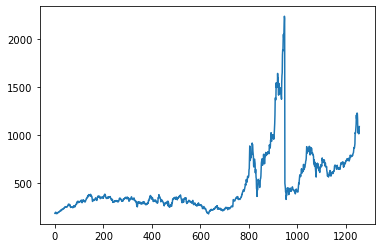

In [36]:
import matplotlib.pyplot as plt
plt.plot(data)

NORMALIZING THE DATA USING MINMAXSCALER

In [37]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

TRAIN & TEST SPLIT

In [38]:
train_size=int(len(data)*0.65) #Training size 65% of data
test_size=len(data)-train_size  #Testing size 35% of data
train_data,test_data=data[0:train_size,:],data[train_size:len(data),:1]
train_size,test_size

(817, 440)

In [39]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]         #if timestep =100 , i=0, 0,1,2,3-----99  ---> Total(100) 
        dataX.append(a)
        dataY.append(dataset[i + time_step,0]) #timestep+1 as output
    return numpy.array(dataX), numpy.array(dataY)

In [40]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test,  ytest   = create_dataset(test_data, time_step)
print(X_test.shape), print(ytest.shape)


(339, 100)
(339,)


(None, None)

In [41]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_test.shape), print(ytest.shape)

(339, 100, 1)
(339,)


(None, None)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(25))
model.add(LSTM(50))
model.add(Dropout(0.2))  
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='Nadam')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-487e644d1430>", line 10, in <module>
    model.add(LSTM(50))
  File "D:\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "D:\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\engine\sequential.py", line 203, in add
    output_tensor = layer(self.outputs[0])
  File "D:\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\layers\recurrent.py", line 644, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "D:\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py", line 737, in __call__
    self.name)
  File "D:\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\eng

In [ ]:
model.summary()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-5f15418b3570>", line 1, in <module>
    model.summary()
  File "D:\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\engine\network.py", line 1302, in summary
    raise ValueError('This model has not yet been built. '
ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=15,verbose=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-01367b06cb40>", line 1, in <module>
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=15,verbose=1)
  File "D:\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 796, in fit
    self._assert_compile_was_called()
  File "D:\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 2828, in _assert_compile_was_called
    raise RuntimeError('You must compile your model before '
RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line

In [13]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 180


In [14]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-0b744cfcba0c>", line 3, in <module>
    math.sqrt(mean_squared_error(y_train,train_predict))
  File "D:\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  File "D:\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py", line 100, in _check_reg_targets
    "({0}!={1})".format(y_true.shape[1], y_pred.shape[1]))
ValueError: y_true and y_pred have different number of output (1!=100)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interact

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-3e6ceb788da6>", line 2, in <module>
    math.sqrt(mean_squared_error(ytest,test_predict))
  File "D:\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  File "D:\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py", line 100, in _check_reg_targets
    "({0}!={1})".format(y_true.shape[1], y_pred.shape[1]))
ValueError: y_true and y_pred have different number of output (1!=100)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactive

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-83f69782f9a8>", line 6, in <module>
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
ValueError: could not broadcast input array from shape (716,100) into shape (716,1)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_li

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-83f69782f9a8>", line 6, in <module>
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
ValueError: could not broadcast input array from shape (716,100) into shape (716,1)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
    if (await self.run_code(code, resul

In [15]:
len(test_data)

440

In [16]:
x_input=test_data[340:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
x_input.shape


ERROR! Session/line number was not unique in database. History logging moved to new session 183


(1, 100)

PREDCITION FOR  THE NEXT DAY 30 DAY

In [ ]:
from numpy import array

Predict=[]
steps=100
i=0
while(i<30):
    
    if(len(temp_input)>steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        Predict.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        Predict.extend(yhat.tolist())
        i=i+1

[-1.0107799e-02 -1.7675761e-02 -8.1148911e-03 -2.3804229e-02
  2.0915021e-03 -8.3443830e-03 -1.9263150e-02 -1.6862934e-02
 -7.6175556e-03 -2.5695863e-03  2.1905424e-03 -1.5303629e-03
 -3.1307889e-03 -2.1630311e-02  1.3795802e-02 -1.6670033e-02
  7.4991714e-03 -3.0470895e-02  3.6252642e-04 -3.0364322e-03
 -3.6287741e-03  8.2652997e-03  1.3263904e-02 -1.2490818e-03
 -3.6924910e-03 -1.3224927e-02  1.7367271e-03  1.9389650e-02
 -2.5103707e-02 -7.7377958e-03 -1.3204969e-02 -2.0317745e-03
 -2.3602776e-03  1.0403426e-02 -2.7602885e-02  2.4748235e-03
 -3.1070069e-03 -3.6003406e-03 -1.2869806e-02 -2.6760378e-03
 -1.5296771e-02  4.6582278e-03 -3.7811468e-03  1.2261105e-02
 -2.7426030e-02 -1.5340617e-03 -2.8370961e-03  2.8457311e-03
 -1.4679824e-02 -2.0388281e-03  1.8135732e-02 -2.1162292e-02
 -1.8558444e-03 -2.7566414e-02  2.4130546e-02 -3.4784074e-03
 -1.6267628e-05  9.7422972e-03  1.1387631e-02 -1.5712030e-02
 -1.8120903e-04  6.4291093e-03 -1.1334694e-02  6.3229082e-03
  1.8549539e-02 -2.87112

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-54e84350a545>", line 13, in <module>
    x_input = x_input.reshape((1, steps, 1))
ValueError: cannot reshape array of size 199 into shape (1,100,1)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "D:\anaconda3\env

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-54e84350a545>", line 13, in <module>
    x_input = x_input.reshape((1, steps, 1))
ValueError: cannot reshape array of size 199 into shape (1,100,1)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "D:\anaconda3\envs\tf\lib\s

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique inTraceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-a7c1622b7360>", line 5, in <module>
    plt.plot(day_pred,scaler.inverse_transform(Predict))
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\pyplot.py", line 2842, in plot
    **({"data": data} if data is not None else {}), **kwargs)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_axes.py", line 1743, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_base.py", line 273, in __call__
    yield from self._plot_args(this, kwargs)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_base.py", line 399, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "
ValueError: x and y must have sa

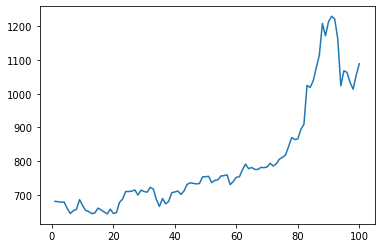

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(data[1157:]))
plt.plot(day_pred,scaler.inverse_transform(Predict))

VISUALIZATION

D:\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 185
TypeError: float() argument must be a string or a number, not 'list'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-ea5ff0c6ff81>", line 3, in <module>
    plt.plot(visualize)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\pyplot.py", line 2842, in plot
    **({"data": data} if data is not None else {}), **kwargs)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_axes.py", line 1745, in plot
    self.add_line(line)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_base.py", line 1964, in add_line
    self._update_line_limits(line)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_base.py", line 1986,

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



TypeError: float() argument must be a string or a number, not 'list'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-ea5ff0c6ff81>", line 3, in <module>
    plt.plot(visualize)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\pyplot.py", line 2842, in plot
    **({"data": data} if data is not None else {}), **kwargs)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_axes.py", line 1745, in plot
    self.add_line(line)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_base.py", line 1964, in add_line
    self._update_line_limits(line)
  File "D:\anaconda3\envs\tf\lib\site-packages\matplotlib\axes\_base.py", line 1986, in _update_line_limits
    path = line.get_path()
  File "D:\anaconda3\envs\tf\lib\site-package

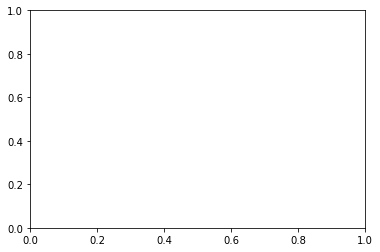

In [ ]:
visualize=data.tolist()
visualize.extend(Predict)
plt.plot(visualize)

FOCUS ON 30 DAY PREDICTION OF THE STOCK

ERROR! Session/line number was not unique in database. History logging moved to new session 186


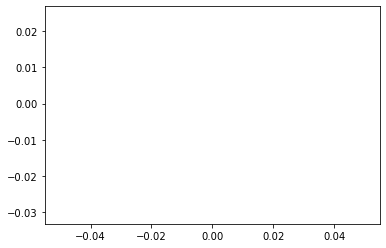

In [17]:
plt.plot(visualize[1257:])

SAVING THE PREDICTION AS CSV TO VISUALIZE IN POWERBI

In [ ]:
save = pd.DataFrame(scaler.inverse_transform(Predict),columns=["predictions"])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\pandas\core\internals\managers.py", line 1676, in create_block_manager_from_blocks
    values=blocks[0], placement=slice(0, len(axes[0])), ndim=2
  File "D:\anaconda3\envs\tf\lib\site-packages\pandas\core\internals\blocks.py", line 2742, in make_block
    return klass(values, ndim=ndim, placement=placement)
  File "D:\anaconda3\envs\tf\lib\site-packages\pandas\core\internals\blocks.py", line 143, in __init__
    f"Wrong number of items passed {len(self.values)}, "
ValueError: Wrong number of items passed 100, placement implies 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-565b275d8e98>", line 1, in <module>
    save = pd.DataFrame(scaler.inverse_transform(Predict)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\pandas\core\internals\managers.py", line 1676, in create_block_manager_from_blocks
    values=blocks[0], placement=slice(0, len(axes[0])), ndim=2
  File "D:\anaconda3\envs\tf\lib\site-packages\pandas\core\internals\blocks.py", line 2742, in make_block
    return klass(values, ndim=ndim, placement=placement)
  File "D:\anaconda3\envs\tf\lib\site-packages\pandas\core\internals\blocks.py", line 143, in __init__
    f"Wrong number of items passed {len(self.values)}, "
ValueError: Wrong number of items passed 100, placement implies 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-565b275d8e98>", line 1, in <module>
    save = pd.DataFrame(scaler.inverse_transform(Predict)

In [ ]:
save.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-639fd0fe67e1>", line 1, in <module>
    save.head()
NameError: name 'save' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\ultratb.py", line 248, i

In [ ]:
save.to_csv('Pred.csv')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-9636894fb14b>", line 1, in <module>
    save.to_csv('Pred.csv')
NameError: name 'save' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "D:\anaconda3\envs\tf\lib\site-packages\IPython\core\ultratb.py",